# MRI QC Report

**Author**: Haroon Popal

This notebook will create the **participants.tsv** file in the BIDS format which will include the subject ID and demographic information for all participants with fmriprep data. The notebook will also create a second list of participants and their run data, **participants_good_SR.csv**, for the social reward task that meets quality control thresholds. Participants may be exluced for excessive motion and/or poor MRI run quality, or if there were issues with their task run data. 

In [1]:
import os
import sys
import glob
import pandas as pd
import numpy as np
from datetime import datetime, date

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
proj_dir = '/Users/hpopal/Google Drive/My Drive/dscn_lab/projects/net/'

os.chdir(proj_dir)

# BIDS Participants List

## Import QC spreadsheet
This spreadsheet is derived from the [SCN fMRI Master Log](https://docs.google.com/spreadsheets/d/1-MOW372sO0g1y9cKl1_GkhMunp0lgdst11etN7qmZvU/edit#gid=158950615) QC tab and contains information on all participants who were scanned, and the quality control reading each of their runs.

In [8]:
mriqc_raw = pd.read_csv(proj_dir+'derivatives/motionsummary_cb.csv')
mriqc_raw.head()

,Subject_ID,Run,MaxFD,MeanFD,SdFD,CensorPercent,Quality,Cerebellum,Notes
0,sub-NET011,T1,NaN,NaN,NaN,NaN,good,yes,NaN
1,sub-NET011,run-1,0.550616,0.189526,0.079709,0.0,good,yes,frontal intensity
2,sub-NET011,run-2,0.344154,0.171332,0.072854,0.0,good,yes,frontal intensity
3,sub-NET011,run-3,0.446952,0.175449,0.069946,0.0,good,yes,frontal intensity
4,sub-NET011,run-4,0.505895,0.161364,0.073391,0.0,good,yes,frontal intensity


In [13]:
# Pull just the participant IDs
#participant_list = [x for x in mriqc_raw.index if str(x).startswith('sub-NET')]
participant_list = mriqc_raw['Subject_ID'].unique().tolist()

## Import Demographic Info

### Calculate age

### Visualize Demographics

### Fix participant IDs

## Export General List

In [15]:
fmriprep_demo = pd.DataFrame(participant_list, columns=['participant_id'])
fmriprep_demo.head()

,participant_id
0,sub-NET011
1,sub-NET012
2,sub-NET014
3,sub-NET016
4,sub-NET017


In [16]:
fmriprep_demo.to_csv(proj_dir+'/participants.tsv', sep='\t', 
                                index=False)

***

# Imaging QC

This section will create a list of participants which have passed the lab based MRI QC protocols. 

## Import QC Data

In [22]:
mriqc_raw.head()

,Subject_ID,Run,MaxFD,MeanFD,SdFD,CensorPercent,Quality,Cerebellum,Notes
0,sub-NET011,T1,NaN,NaN,NaN,NaN,good,yes,NaN
1,sub-NET011,run-1,0.550616,0.189526,0.079709,0.0,good,yes,frontal intensity
2,sub-NET011,run-2,0.344154,0.171332,0.072854,0.0,good,yes,frontal intensity
3,sub-NET011,run-3,0.446952,0.175449,0.069946,0.0,good,yes,frontal intensity
4,sub-NET011,run-4,0.505895,0.161364,0.073391,0.0,good,yes,frontal intensity


Total number of participants:

In [21]:
len(participant_list)

64

## Visualize MRI QC Metadata

### All MRI QC values

<Axes: xlabel='Run,Quality'>

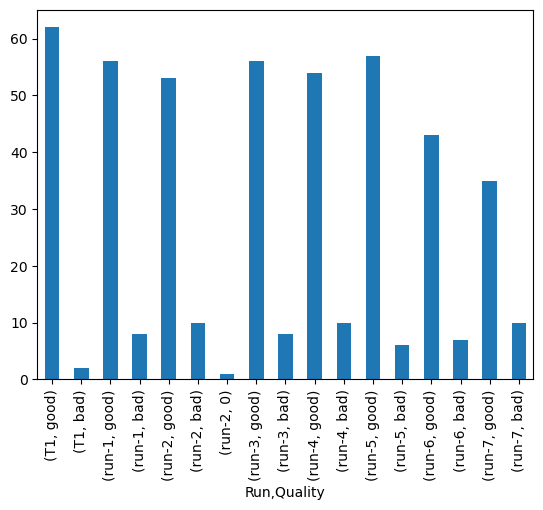

In [24]:
mriqc_raw.groupby('Run')['Quality'].value_counts().plot.bar()

Count the number of participants that are being completly excluded because none of their scan data is usable:

In [28]:
len(mriqc_raw[mriqc_raw['Quality'] != 'good']['Subject_ID'].unique())

25

### Number of good scans

In [33]:
mriqc_melt_good = mriqc_raw[mriqc_raw['Quality'] == 'good']
mriqc_melt_good = mriqc_melt_good.rename(columns={"Subject_ID": "participant_id"})

<Axes: xlabel='Run,Quality'>

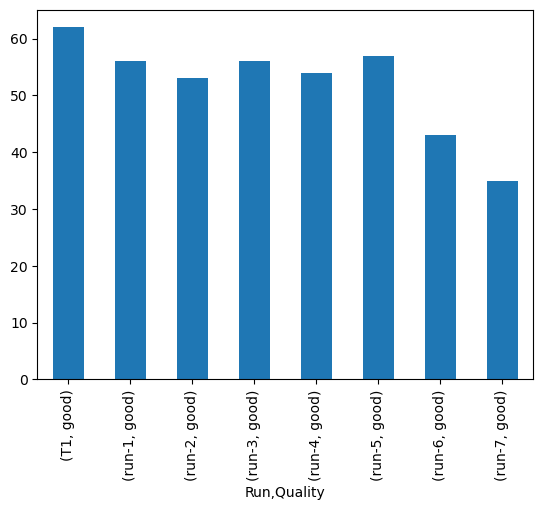

In [34]:
mriqc_melt_good.groupby('Run')['Quality'].value_counts().plot.bar()

### Visualize demographics

## Export "Good" MRI QC Participant and Run Info

In [35]:
mriqc_melt_good[['participant_id','Run']].to_csv(proj_dir+'derivatives/participants-qc.csv', 
                                                 index=False)

***

# Behavioral QC
The task programming had an error which would show the participant incorrect options for their own preferences (e.g. would show "like animals", when the participant said they didn't like animals). We will remove participants for which this occurred a lot (more than 5 trial).